In [1]:
# import libraries
from dash import Dash, dcc, html, Input, Output, callback
import pandas as pd
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
import mpld3
import plotly.tools as tls
from io import BytesIO
import base64

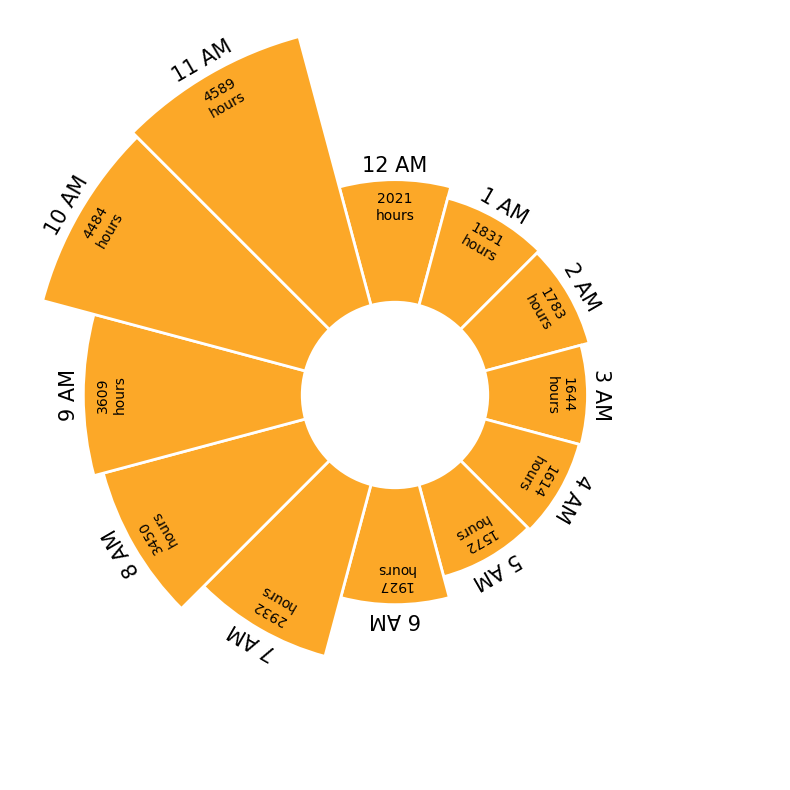

In [3]:
data = pd.read_csv('../DATA/data.csv')

## group by the hour of the day and find the number of minutes 
hours = data.groupby('hour')['minutes'].sum()
# change the index 
hours.index = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, \
               3, 4, 5, 6, 7, 8, 9, 10, 11]
hoursam = hours.iloc[:12]
hourspm = hours.iloc[12:]

allhours = [hoursam, hourspm]

#initialize the plot 
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')


# Compute max and min in the dataset
max = hoursam.max()

# Set the coordinates limits
upperLimit = max
lowerLimit = max/3

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * hoursam + lowerLimit

#Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(hoursam.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(hoursam)+1))
angles = [element * width * -1 + np.deg2rad(120) for element in indexes]


# add bars 
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#fca828",
)

# little space between the bar and the label
labelPadding = max/20


# Add labels
for bar, angle, height, label in zip(bars,angles, heights, hoursam.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)-90

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() - 2*labelPadding, 
        s=f'{round(height)}\nhours', 
        ha='center', 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 


# Add more lables labels
for bar, angle, height, label in zip(bars,angles, heights, hoursam.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)-90

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=f'{label} AM', 
        ha='center', 
        va='center',
        size = 15,
        rotation=rotation, 
        rotation_mode="anchor") 
    

